# Make Blobs Clustering

## Load Dataset

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)

In [2]:
print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))

X.shape: (100, 2)
y.shape: (100,)


## Train and Evaluate Model

### k-Means

In [3]:
# k-Means Clustering with 3 clusters
from sklearn.cluster import KMeans

kmeans_model_3 = KMeans(n_clusters=3)
kmeans_model_3.fit(X)

KMeans(n_clusters=3)

In [4]:
# Prediction
print("Prediction:", kmeans_model_3.predict(X))

Prediction: [0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


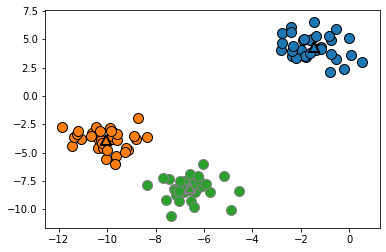

In [5]:
# Visualization
import mglearn

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans_model_3.labels_, markers=["o"])
mglearn.discrete_scatter(
    kmeans_model_3.cluster_centers_[:, 0], kmeans_model_3.cluster_centers_[:, 1], [0, 1, 2],
    markers=["^"], markeredgewidth=2)

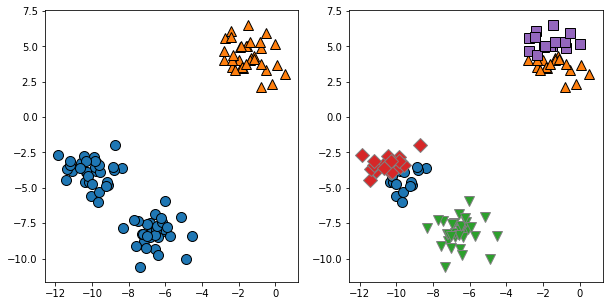

In [6]:
# k-Means Clustering with 2 and 5 clusters
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# with 2 clusters
kmeans_model_2 = KMeans(n_clusters=2)
kmeans_model_2.fit(X)
assignments = kmeans_model_2.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# with 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

### Agglomerative Clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
assignment = agg_model.fit_predict(X)

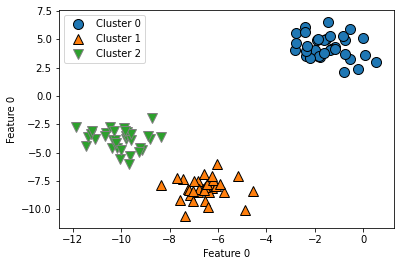

In [8]:
# Visualization
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 0")
plt.show()

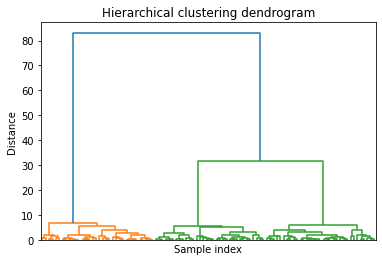

In [9]:
# Visualization (with dendrogram)
from scipy.cluster.hierarchy import dendrogram, ward

linkage_matrix = ward(X)
dendrogram(linkage_matrix, leaf_rotation=90)

plt.title("Hierarchical clustering dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.tick_params(axis="x", labelbottom=False)
plt.show()

### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

In [10]:
X, y = make_blobs(random_state=0, n_samples=12)

In [11]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.5, min_samples=5)
assignment = dbscan_model.fit_predict(X)

print("Prediction:", assignment)

Prediction: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
